#Retail Sales Analysis

This Project analyzes sales performance, identify trends, and visualize business KPIs like profit, sales, and region-wise performance.

**Dataset** : https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

###Import Libraries and Installation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set for visualization
sns.set(style="whitegrid")

### Dataset

In [12]:
df = pd.read_csv("/content/Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


###Initial Data Exploration

In [13]:
#Shape of the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

Dataset shape: (9994, 21)

Column names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [14]:
#info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
#Summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
#Checking for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

#Handling duplicates if any
df = df.drop_duplicates()

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Duplicates: 0


###Exploratory Analysis (KPI-Level Insights)

#### Total Sales and Total Profit

In [19]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: Rs {total_sales:,.2f}")
print(f"Total Profit: Rs {total_profit:,.2f}")

Total Sales: Rs 2,297,200.86
Total Profit: Rs 286,397.02


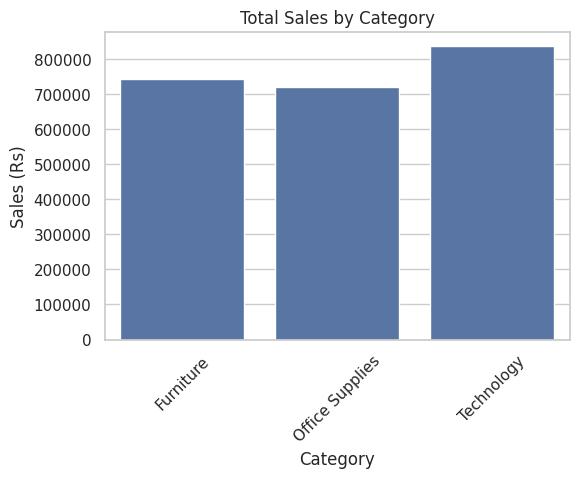

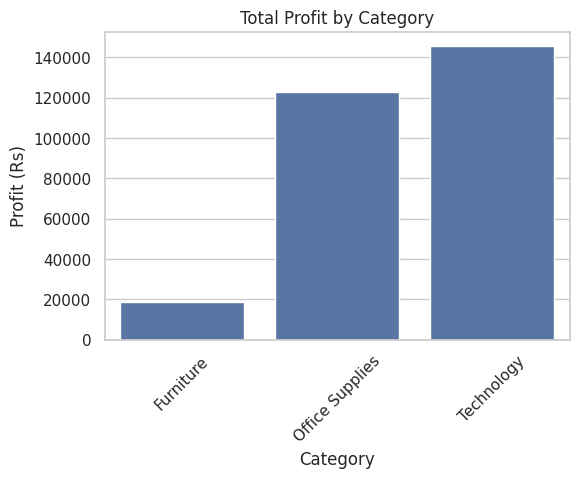

In [27]:
category_kpis = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

# Sales by category
plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Sales', data=category_kpis)
plt.title("Total Sales by Category")
plt.ylabel("Sales (Rs)")
plt.xticks(rotation=45)
plt.show()

# Profit by category
plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Profit', data=category_kpis)
plt.title("Total Profit by Category")
plt.ylabel("Profit (Rs)")
plt.xticks(rotation=45)
plt.show()

- Technology generates the highest sales.
- However, Furniture may have lower profitability — potential over-discounting?


### Regional and State-level Performance


#### Profit by Region

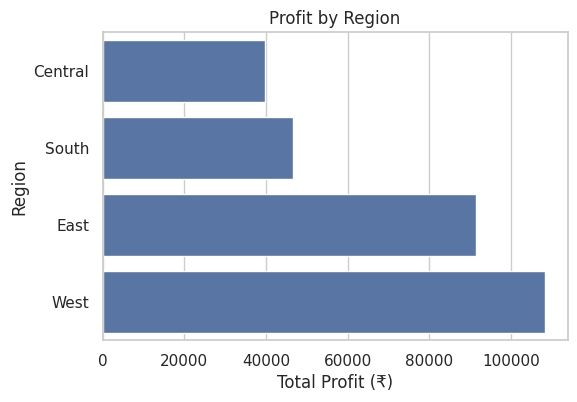

In [28]:
plt.figure(figsize=(6, 4))
region_profit = df.groupby('Region')['Profit'].sum().sort_values()

sns.barplot(x=region_profit.values, y=region_profit.index)
plt.title("Profit by Region")
plt.xlabel("Total Profit (₹)")
plt.ylabel("Region")
plt.show()


####Top 10 States by Profit

In [ ]:
plt.figure(figsize=(7, 5))
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=state_profit.values, y=state_profit.index)
plt.title("Top 10 States by Profit")
plt.xlabel("Profit (₹)")
plt.ylabel("State")
plt.show()

#### Monthly sales trend

Converting the Order Date column to datetime format and group sales by month

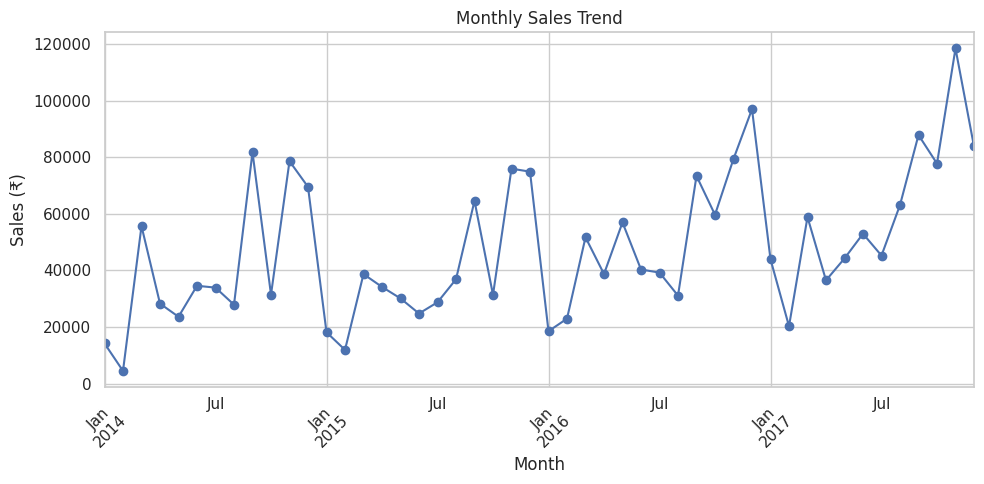

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales (₹)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Observations:

1. Sales are highly seasonal.
  * We  can clearly see spikes in sales around November and December every year. This likely reflects holiday shopping periods — Black Friday, Christmas, etc.
2. Each year ends stronger than it begins.
  * Sales start low in Jan/Feb and then gradually increase toward the end of each year.

3. The overall trend is upward.
  * Over the years (2014–2017), the peak sales values are rising, showing the business may be growing steadily.

4. Some months are flat or dip slightly, like early/mid Q2. This could indicate:

  * Off-seasons or fewer promotions
  * Inventory shortages
  * Fewer new product launches

####Top 10 sub-categories by sales

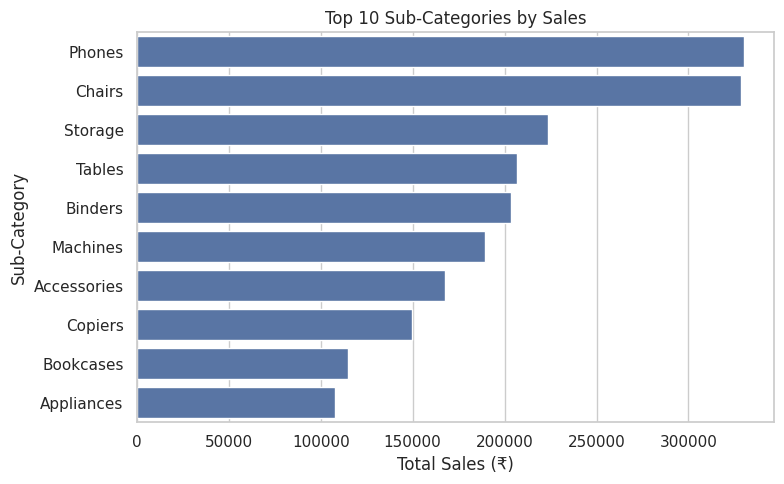

In [31]:
top_subcats = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_subcats.values, y=top_subcats.index)
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


#### Observations:

1. Phones and Chairs dominate in sales — major revenue drivers.

2. Tables again ranks high in sales, but remember: it had negative profit.

3. Sub-categories like Copiers, Machines, and Appliances also show strong revenue performance.

#### Bottom 10 by Profit

<ipython-input-32-1c5d0082e7b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_profit.values, y=bottom_profit.index, palette='Reds_r')


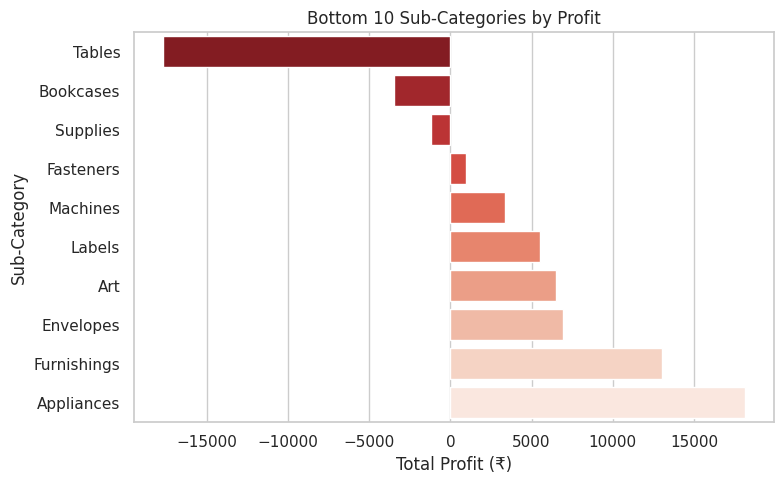

In [32]:
bottom_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=bottom_profit.values, y=bottom_profit.index, palette='Reds_r')
plt.title("Bottom 10 Sub-Categories by Profit")
plt.xlabel("Total Profit (₹)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


#### Observations:

1. Tables and Bookcases are causing massive losses:

    Despite decent sales (Tables is in the top 5 by sales!), the profit is negative, indicating over-discounting, high return rates, or costly fulfillment.

2. Supplies, Fasteners, Machines, and Labels are just breaking even or barely profitable.

3. Items like Art, Envelopes, and Furnishings are moderately profitable, but not enough to be strategic priorities.